In [1]:
import sys
sys.path.append('/home/insauer/Climada/climada_python')
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from climada.hazard.river_flood import RiverFlood
from climada.hazard.centroids import Centroids
from shapely.geometry.multipolygon import MultiPolygon
from climada.entity.exposures.base import Exposures
from climada.entity.impact_funcs.river_flood import flood_imp_func_set
from climada.engine import Impact


/home/insauer/anaconda3/envs/climada_old/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [54]:
PHL_0_FRC = '/home/insauer/mnt/cama-flood/volkholz/cama-flood-runs/isimip3a_210723_flopros/out/web-dhm-sg/gswp3-w5e5_obsclim/histsoc_default/area-150arcsec-fit-obsclim_histsoc/fldfrc_annual_max_gev_0.1mmpd_protection-flopros.nc'
PHL_0_DPH  = '/home/insauer/mnt/cama-flood/volkholz/cama-flood-runs/isimip3a_210723_flopros/out/web-dhm-sg/gswp3-w5e5_obsclim/histsoc_default/depth-150arcsec-fit-obsclim_histsoc/flddph_annual_max_gev_0.1mmpd_protection-flopros.nc'
gdp_path = '/home/insauer/mnt/ebm/inga/climada_exposures/asset/'

In [42]:
import pandas as pd
import numpy as np

data = pd.read_csv('/home/insauer/projects/NC_Submission/Data/check_data/assembled_data_regions.csv')

data_phl = data.loc[(data['Country']=='MWI') & (data['Year']>1979) & (data['clim_forc']!='watch')]

natcat = data_phl.loc[((data_phl['clim_forc']=='wfdei') & (data_phl['GHM']=='dbh')),
                      ['Year','natcat_flood_damages_2005_CPI']]
natcat

,Year,natcat_flood_damages_2005_CPI
100844,1980,0.000000e+00
111332,1981,0.000000e+00
121820,1982,0.000000e+00
132308,1983,0.000000e+00
142796,1984,0.000000e+00
153284,1985,0.000000e+00
163772,1986,0.000000e+00
174260,1987,0.000000e+00
184748,1988,0.000000e+00
195236,1989,1.475127e+07


In [17]:
shape_path = '/home/insauer/projects/WB_model/hhwb/data/shapes/mwi_adm_nso_20181016_shp/mwi_admbnda_adm2_nso_20181016.shp'
prvS = gpd.GeoDataFrame()
prvS = gpd.read_file(shape_path)
prvS

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.036817,0.179379,Balaka,MW312,None,None,None,Southern,MW3,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((35.20154 -14.75811, 35.20882 -14.768..."
1,2.677448,0.150847,Blantyre,MW305,None,None,None,Southern,MW3,Malawi,MW,2018-09-03,2018-10-16,None,"MULTIPOLYGON (((35.11249 -15.85563, 35.11345 -..."
2,0.818570,0.019929,Blantyre City,MW315,None,None,None,Southern,MW3,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((35.08555 -15.71055, 35.08241 -15.719..."
3,3.521776,0.413457,Chikwawa,MW310,None,None,None,Southern,MW3,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((34.34848 -15.74126, 34.34901 -15.741..."
4,1.527801,0.064117,Chiradzulu,MW304,None,None,None,Southern,MW3,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((35.15417 -15.53382, 35.15359 -15.534..."
5,5.039122,0.350477,Chitipa,MW101,None,None,None,Northern,MW1,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((33.00618 -9.36798, 33.00641 -9.36801..."
6,3.654707,0.314965,Dedza,MW208,None,None,None,Central,MW2,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((34.31159 -13.89755, 34.31117 -13.898..."
7,3.355039,0.255986,Dowa,MW204,None,None,None,Central,MW2,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((33.70319 -13.19732, 33.70394 -13.197..."
8,3.520828,0.281466,Karonga,MW102,None,None,None,Northern,MW1,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((33.73312 -9.58176, 33.73382 -9.58202..."
9,4.854784,0.672040,Kasungu,MW201,None,None,None,Central,MW2,Malawi,MW,2018-09-03,2018-10-16,None,"POLYGON ((33.60713 -12.37303, 33.60562 -12.375..."


In [18]:
regions = list(prvS['ADM2_PCODE'])
regions

['MW312',
 'MW305',
 'MW315',
 'MW310',
 'MW304',
 'MW101',
 'MW208',
 'MW204',
 'MW102',
 'MW201',
 'MW106',
 'MW206',
 'MW210',
 'MW302',
 'MW301',
 'MW207',
 'MW308',
 'MW306',
 'MW105',
 'MW107',
 'MW313',
 'MW103',
 'MW202',
 'MW311',
 'MW209',
 'MW203',
 'MW309',
 'MW104',
 'MW205',
 'MW307',
 'MW303',
 'MW314']

Text(0, 0.5, 'Damage in USD')

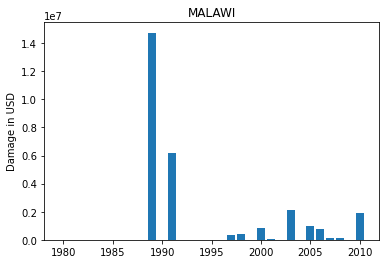

In [55]:
import matplotlib.pyplot as plt

plt.bar(natcat['Year'], natcat['natcat_flood_damages_2005_CPI'])
plt.title("MALAWI")
plt.ylabel("Damage in USD")

In [ ]:
years = np.arange(1980,2011)
# calculate country level damage
rf_cnt = RiverFlood()
#bas_shape=MultiPolygon([shape])
rf_cnt.set_from_nc(countries=['MWI'], years=years, dph_path=PHL_0_DPH, frc_path=PHL_0_FRC)
#rf_cnt.centroids.plot()
rf_cnt.plot_intensity(0)

In [6]:
# set JRC impact functions
if_set = flood_imp_func_set()

In [51]:
years = np.arange(1980,2011)
imp_cnt = np.zeros((31))
for n,year in enumerate(years):
    ini_date = str(year) + '-01-01'
    fin_date = str(year) + '-12-31'
    gdpa = Exposures()
    gdpa.read_hdf5(gdp_path + 'asset_MWI_{}.h5'.format(str(year)))
    #gdpa['if_RF'] = 7
    
    imp = Impact()
    imp.calc(gdpa, if_set, rf_cnt.select(date=(ini_date, fin_date)))
    imp_cnt[n] = imp.at_event

In [33]:
import scipy as sp
# calculate country level damage
rf_new = RiverFlood()
#bas_shape=MultiPolygon([shape])
rf_new.set_from_nc(countries=['PHL'], years=years, dph_path=PHL_0_DPH, frc_path=PHL_0_FRC, ISINatIDGrid=True)
rf_new.event_name

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010']

In [27]:
cut_years = [13,18]

mask_frac = np.array(rf_new.fraction.todense()[11,:])[0]
print(mask_frac.sum())
for cut_year in cut_years:
    mask_frac =np.maximum(mask_frac, np.array(rf_new.fraction.todense()[cut_year,:])[0])
    print(mask_frac.sum())

51.09258078597486
54.71415773744229
164.14617856091354


In [28]:
masked_fraction = np.array(np.subtract(rf_new.fraction.todense(), mask_frac))
masked_fraction = masked_fraction.clip(0)

In [14]:
imp_adj = np.zeros((31))
rf_new.fraction = sp.sparse.csr_matrix(masked_fraction)
for n,year in enumerate(years):
    ini_date = str(year) + '-01-01'
    fin_date = str(year) + '-12-31'
    gdpa = Exposures()
    gdpa.read_hdf5(gdp_path + 'asset_PHL_{}.h5'.format(str(year)))
    #gdpa['if_rf']= 7
    imp = Impact()
    imp.calc(gdpa, if_set, rf_new.select(date=(ini_date, fin_date)))
    imp_adj[n] = imp.at_event

NameError: name 'sp' is not defined

<BarContainer object of 31 artists>

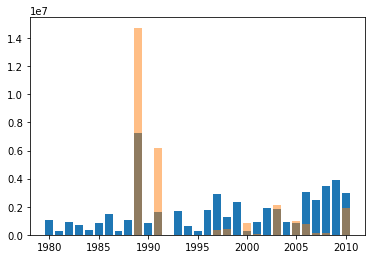

In [52]:
plt.bar(years, imp_cnt/1e2)
plt.bar(natcat['Year'], natcat['natcat_flood_damages_2005_CPI'],alpha=0.5)

In [53]:
import statsmodels.api as sm
import numpy.ma as ma

a = ma.masked_invalid(np.array(natcat['natcat_flood_damages_2005_CPI']))
b = ma.masked_invalid(np.array(imp_cnt))
msk = (~a.mask & ~b.mask)
corrcoef = ma.corrcoef(a[msk], b[msk])
corrcoef

masked_array(
  data=[[1.0, 0.6898255400095855],
        [0.6898255400095855, 1.0]],
  mask=[[False, False],
        [False, False]],
  fill_value=1e+20)

In [36]:
vulnerability = np.array(natcat['natcat_flood_damages_2005_CPI'])/imp_cnt
vulnerability

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.18044170e-02, 0.00000000e+00, 5.42108740e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.59501909e-03, 7.46610148e-03, 0.00000000e+00,
       1.01195956e-01, 6.71798958e-04, 1.11094216e-04, 3.70522129e-02,
       0.00000000e+00, 1.41048156e-02, 7.31622385e-03, 2.73266406e-03,
       1.02126710e-03, 0.00000000e+00, 3.93586416e+00])

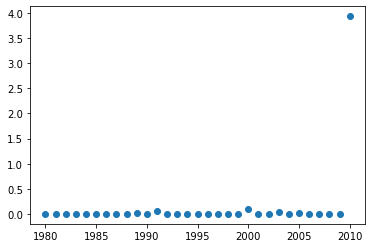

In [37]:
plt.scatter(years, vulnerability)

<BarContainer object of 31 artists>

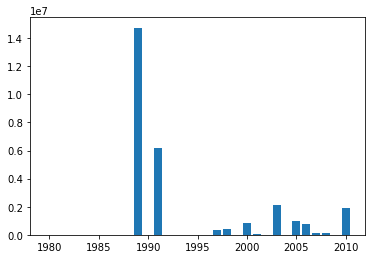

In [28]:
damage_ts = imp_cnt*vulnerability
plt.bar(years, damage_ts)

In [187]:
region_dict = {
 'PH150000000': 15,
 'PH140000000': 14,
 'PH130000000': 13,
 'PH010000000': 1,
 'PH020000000': 2,
 'PH030000000': 3,
 'PH040000000': 41,
 'PH170000000': 42,
 'PH090000000': 9,
 'PH050000000': 5,
 'PH060000000': 6,
 'PH070000000': 7,
 'PH080000000': 8,
 'PH100000000': 10,
 'PH110000000': 11,
 'PH120000000': 12,
 'PH160000000': 16}

cut_years = [13,18]
reg_imp = np.zeros((31,len(regions)))
reg_imp_share = np.zeros((31,len(regions)))
for r, region in enumerate(regions):
    shape = prvS.loc[prvS['ADM1_PCODE']==region, 'geometry'].values[0]
    rf_reg = RiverFlood()
    try:
        
        #bas_shape=MultiPolygon([shape])
        rf_reg.set_from_nc(shape = shape, years=years, dph_path=PHL_0_DPH, frc_path=PHL_0_FRC)
    except TypeError:
        shape = MultiPolygon([shape])
        rf_reg.set_from_nc(shape = shape, years=years, dph_path=PHL_0_DPH, frc_path=PHL_0_FRC)
    mask_frac = np.array(rf_reg.fraction.todense()[11,:])[0]
    
    for cut_year in cut_years:
        mask_frac =np.maximum(mask_frac, np.array(rf_reg.fraction.todense()[cut_year,:])[0])
    
    masked_fraction = np.array(np.subtract(rf_reg.fraction.todense(), mask_frac))
    masked_fraction = masked_fraction.clip(0)
    rf_reg.fraction = sp.sparse.csr_matrix(masked_fraction)
    for n,year in enumerate(years):
        ini_date = str(year) + '-01-01'
        fin_date = str(year) + '-12-31'
        gdpa = Exposures()
        gdpa.read_hdf5(gdp_path + 'asset_PHL_{}.h5'.format(str(year)))
        gdpa['if_rf']= 7
        imp = Impact()
        imp.calc(gdpa, if_set, rf_reg.select(date=(ini_date, fin_date)))
        reg_imp[n,r] = imp.at_event 
        print(reg_imp[n,r])
        gdpa = gdpa.drop(columns='centr_RF')
        reg_imp_share[n,r] = imp.tot_value

0.0
0.0
0.0
58788647.5172115
90150797.25599653
127011449.65765259
131514413.41779819
72578700.47712205
88750345.54326522
204009140.41701108
118786356.5250173
0.0
0.0
0.0
75795256.96677443
153578666.43645996
168645736.3260792
42876340.57310716
0.0
137946151.62619162
553329600.8508911
462060288.19771415
444176704.6682577
363237019.06194675
318865253.84219164
640191263.0163537
408771686.41994834
469681052.91353106
869634163.0365473
755785450.414016
726876274.1549144
2495054.391388901
5886623.637481174
0.0
0.0
392652.68667968595
0.0
5793305.816167369
0.0
0.0
11862986.56490512
53117864.999642596
0.0
2109484.0433929684
0.0
0.0
0.0
0.0
0.0
0.0
7917534.064119437
0.0
150978445.89381567
0.0
0.0
14302095.019424397
19872272.87738927
0.0
0.0
121831241.6011486
86185793.41374548
7471648.196933615
0.0
0.0
0.0
0.0
27872987.457393706
50780962.740207985
98073933.77377717
0.0
417339089.5756746
49258734.60874759
109617744.16450253
0.0
0.0
0.0
0.0
215162222.55428955
0.0
0.0
0.0
371520130.83682317
382743676.

In [221]:
col = years.astype(str)
damages = pd.DataFrame(data=reg_imp, columns = regions)
damages.sum(axis=1)
#damages.insert(0, 'Year', years)
#damages
vul = np.array(natcat['natcat_flood_damages_2005_CPI'])/damages.sum(axis=1)
damages = damages.multiply(vul, axis=0)
damages

,PH150000000,PH140000000,PH130000000,PH010000000,PH020000000,PH030000000,PH040000000,PH170000000,PH090000000,PH050000000,PH060000000,PH070000000,PH080000000,PH100000000,PH110000000,PH120000000,PH160000000
0,0.000000e+00,844.282757,0.000000e+00,4.687377e+04,2.058092e+03,1.397500e+04,8.453665e+01,0.000000,0.000000,0.000000e+00,1.494801e+04,0.000000e+00,2.178256e+03,4.788214e+03,1.648674e+03,4.409572e+03,2.716982e+04
1,0.000000e+00,603518.976662,0.000000e+00,1.887750e+06,1.234594e+06,6.556988e+05,0.000000e+00,0.000000,0.000000,3.920811e+03,1.339637e+04,0.000000e+00,3.747488e+05,1.342797e+06,5.213630e+05,4.652639e+05,3.530668e+07
2,0.000000e+00,0.000000,0.000000e+00,9.307841e+04,0.000000e+00,5.108252e+05,0.000000e+00,6282.540324,0.000000,2.284617e+04,0.000000e+00,3.109519e+04,3.258225e+05,1.944963e+04,0.000000e+00,2.995018e+03,1.342723e+06
3,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2.861946e+06,0.000000,1.144246e+06,1.676097e+06,3.490265e+03,6.627678e+06,8.564328e+05,56477.401160,128278.534567,0.000000e+00,1.501896e+06,9.571723e+04,1.276424e+06,2.590909e+05,5.511935e+05,5.486732e+06,1.537379e+06
6,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,2.592645e+06,0.000000,1.219164e+07,0.000000e+00,4.061886e+04,1.804220e+06,9.208993e+06,119064.920191,211106.946537,1.520105e+05,1.186999e+07,1.969536e+05,2.430005e+06,8.152776e+05,5.206331e+05,3.718462e+06,1.430076e+06
9,1.805173e+05,10496.952696,4.358655e+04,2.735581e+05,1.006829e+04,0.000000e+00,2.577758e+04,3099.205520,0.000000,8.268464e+04,2.458293e+05,3.829445e+03,2.235801e+05,2.983805e+04,1.452025e+04,3.230717e+05,5.668819e+04


In [229]:
rel_damage = np.array(damages)/reg_imp_share
rel_damages = pd.DataFrame(data=rel_damage, columns = regions)
rel_damages.insert(0, 'Year', years)


,Year,PH150000000,PH140000000,PH130000000,PH010000000,PH020000000,PH030000000,PH040000000,PH170000000,PH090000000,PH050000000,PH060000000,PH070000000,PH080000000,PH100000000,PH110000000,PH120000000,PH160000000
0,1980,0.000000e+00,2.350549e-08,0.000000e+00,9.654237e-07,6.399709e-08,1.056827e-07,6.291466e-10,0.000000e+00,0.000000e+00,0.000000e+00,3.757525e-07,0.000000e+00,8.066017e-08,1.867805e-07,8.510463e-08,1.834116e-07,1.897532e-06
1,1981,0.000000e+00,1.527265e-05,0.000000e+00,3.534506e-05,3.498446e-05,4.510536e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.160248e-07,3.065301e-07,0.000000e+00,1.262971e-05,4.770591e-05,2.451173e-05,1.762692e-05,2.246099e-03
2,1982,0.000000e+00,0.000000e+00,0.000000e+00,1.605800e-06,0.000000e+00,3.239709e-06,0.000000e+00,1.110585e-07,0.000000e+00,6.234497e-07,0.000000e+00,5.102412e-07,1.012875e-05,6.377795e-07,0.000000e+00,1.047401e-07,7.885254e-05
3,1983,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1984,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,1985,6.190091e-05,0.000000e+00,1.956651e-05,2.859672e-05,9.084154e-08,4.163032e-05,5.289465e-06,9.917623e-07,7.467280e-06,0.000000e+00,3.144922e-05,1.557384e-06,3.934802e-05,8.438557e-06,2.375905e-05,1.906267e-04,8.970589e-05
6,1986,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,1987,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,1988,4.106525e-05,0.000000e+00,1.516033e-04,0.000000e+00,7.765256e-07,8.296151e-06,4.161995e-05,1.534242e-06,8.997383e-06,3.010824e-06,1.821832e-04,2.348083e-06,5.489123e-05,1.948279e-05,1.646674e-05,9.480752e-05,6.124230e-05
9,1989,2.617509e-06,1.618426e-07,4.951762e-07,3.122788e-06,1.763602e-07,0.000000e+00,1.066290e-07,3.658085e-08,0.000000e+00,1.499303e-06,3.454961e-06,4.180181e-08,4.624296e-06,6.531240e-07,4.206643e-07,7.545380e-06,2.223824e-06


In [233]:
rel_damages.to_csv('/home/insauer/projects/WB_model/hhwb/data/hazard/damage_ts_PHL_wfdei_dbh.csv')

In [232]:
damages

,Year,PH150000000,PH140000000,PH130000000,PH010000000,PH020000000,PH030000000,PH040000000,PH170000000,PH090000000,PH050000000,PH060000000,PH070000000,PH080000000,PH100000000,PH110000000,PH120000000,PH160000000
0,1980,0.000000e+00,844.282757,0.000000e+00,4.687377e+04,2.058092e+03,1.397500e+04,8.453665e+01,0.000000,0.000000,0.000000e+00,1.494801e+04,0.000000e+00,2.178256e+03,4.788214e+03,1.648674e+03,4.409572e+03,2.716982e+04
1,1981,0.000000e+00,603518.976662,0.000000e+00,1.887750e+06,1.234594e+06,6.556988e+05,0.000000e+00,0.000000,0.000000,3.920811e+03,1.339637e+04,0.000000e+00,3.747488e+05,1.342797e+06,5.213630e+05,4.652639e+05,3.530668e+07
2,1982,0.000000e+00,0.000000,0.000000e+00,9.307841e+04,0.000000e+00,5.108252e+05,0.000000e+00,6282.540324,0.000000,2.284617e+04,0.000000e+00,3.109519e+04,3.258225e+05,1.944963e+04,0.000000e+00,2.995018e+03,1.342723e+06
3,1983,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,1984,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,1985,2.861946e+06,0.000000,1.144246e+06,1.676097e+06,3.490265e+03,6.627678e+06,8.564328e+05,56477.401160,128278.534567,0.000000e+00,1.501896e+06,9.571723e+04,1.276424e+06,2.590909e+05,5.511935e+05,5.486732e+06,1.537379e+06
6,1986,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,1987,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,1988,2.592645e+06,0.000000,1.219164e+07,0.000000e+00,4.061886e+04,1.804220e+06,9.208993e+06,119064.920191,211106.946537,1.520105e+05,1.186999e+07,1.969536e+05,2.430005e+06,8.152776e+05,5.206331e+05,3.718462e+06,1.430076e+06
9,1989,1.805173e+05,10496.952696,4.358655e+04,2.735581e+05,1.006829e+04,0.000000e+00,2.577758e+04,3099.205520,0.000000,8.268464e+04,2.458293e+05,3.829445e+03,2.235801e+05,2.983805e+04,1.452025e+04,3.230717e+05,5.668819e+04


In [237]:
testdict = {'b': [3,4,5],
           'c':[2,3,4]}

testdict.update({'item3': 3})
testdict

{'b': [3, 4, 5], 'c': [2, 3, 4], 'item3': 3}